In [1]:
!pip install missingno

!pip install joblib

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Import Dataset

In [3]:
data = pd.read_csv("AB_NYC_2019.csv")


# Explore the Dataset 

In [4]:
data.sample(2)

id                               name   host_id host_name  \
28921  22290370                MODERN HIPSTER LOFT  11680404    Corina   
13667  10244467  Gramercy Suite at The Loralei B&B  18652590   Robert2   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
28921            Brooklyn  Williamsburg  40.71304  -73.96252  Entire home/apt   
13667            Brooklyn      Flatbush  40.63177  -73.96341     Private room   

       price  minimum_nights  number_of_reviews last_review  \
28921    140               5                  0         NaN   
13667    185               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
28921                NaN                               1                 0  
13667                NaN                               1                 0

In [5]:
data.rename(columns={'neighbourhood_group': 'location'}, inplace=True)
data.rename(columns={'neighbourhood': 'area'}, inplace=True)
data.sample()

id                              name   host_id host_name  \
31948  24938183  Private rooftop Penthouse heaven  13089912       Leo   

        location          area  latitude  longitude        room_type  price  \
31948  Manhattan  East Village   40.7258  -73.97963  Entire home/apt    330   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
31948               2                  3  2019-05-27               0.25   

       calculated_host_listings_count  availability_365  
31948                               2                22

In [6]:
data.iloc[:,3:].describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [7]:
data.shape
#(rows,columns)

(48895, 16)

# Checking for null values

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
location                              0
area                                  0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
(data.isnull().sum() / len(data)) *100
# % of null values

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
location                           0.000000
area                               0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

# Cleaning Data

# 1) Remove unnecessary columns

In [10]:
data.drop(['name','id','host_name','last_review'] , axis=1 , inplace=True)

fill null values in reviews_per_month by 0

In [11]:
data['reviews_per_month'].fillna(0, inplace=True)
data.isnull().sum()

host_id                           0
location                          0
area                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
data.head()
#display first 5 rows of dataset

host_id   location          area  latitude  longitude        room_type  \
0     2787   Brooklyn    Kensington  40.64749  -73.97237     Private room   
1     2845  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2     4632  Manhattan        Harlem  40.80902  -73.94190     Private room   
3     4869   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4     7192  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

# Data Visualization

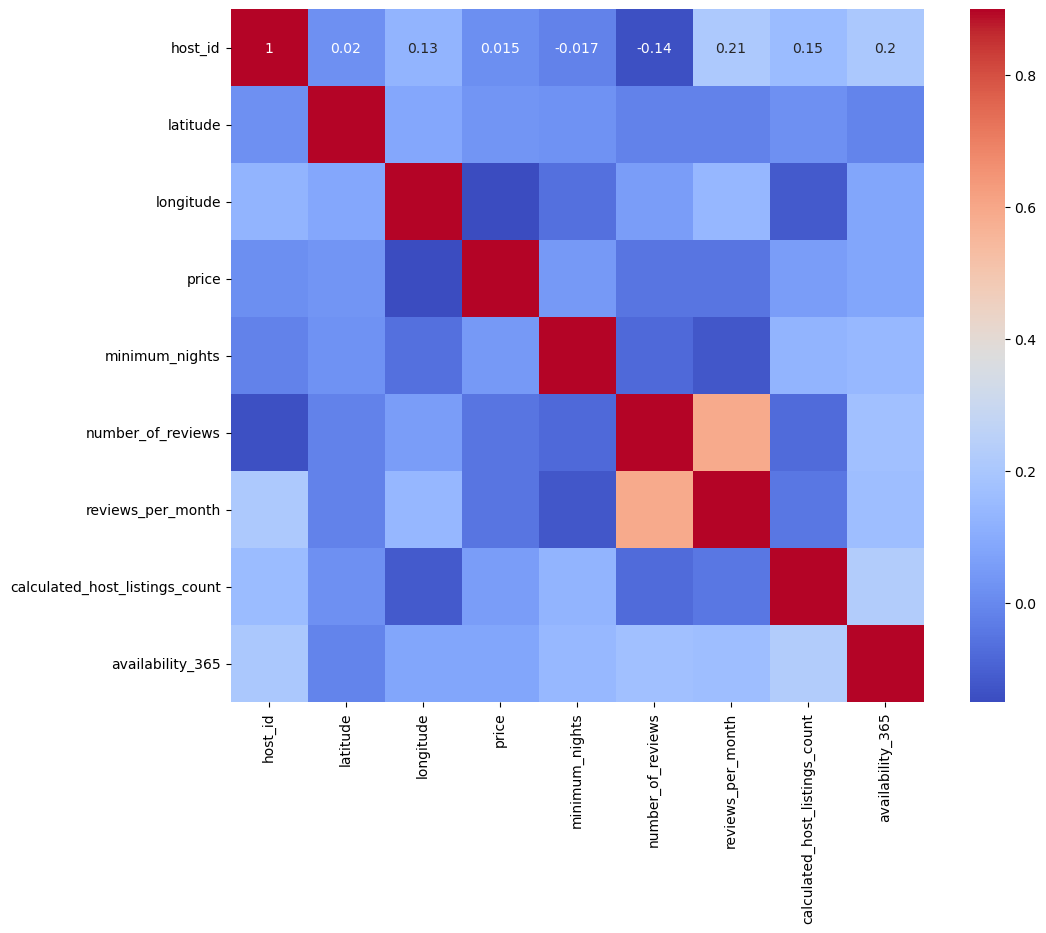

In [13]:
#plot a heatmap
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
corrmat = numeric_data.corr()  # Calculate correlation matrix from numeric data

plt.subplots(figsize=(12, 9))  # Set the figure size
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, cmap='coolwarm')  # Plot heatmap
plt.show()  # Display the plot


# 1) Locations

In [14]:
data['location'].value_counts()

location
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

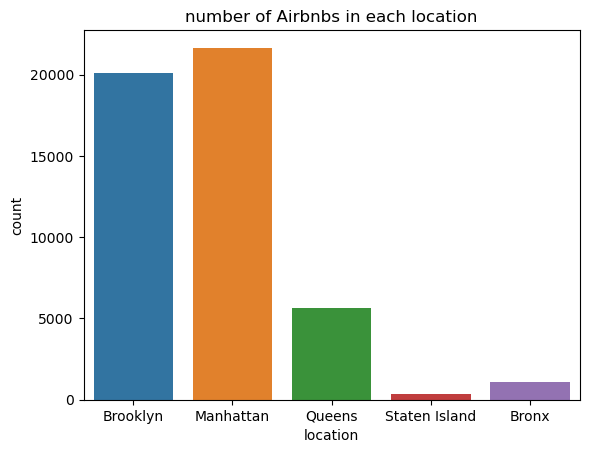

In [15]:
ax = sns.countplot(x="location", data=data)
plt.title ("number of Airbnbs in each location")
plt.show()

# 2) Areas



In [23]:
df=pd.DataFrame(data['area'].value_counts()).reset_index().rename(columns={'index': 'area'})
df

area  count
0          Williamsburg   3920
1    Bedford-Stuyvesant   3714
2                Harlem   2658
3              Bushwick   2465
4       Upper West Side   1971
..                  ...    ...
216      Fort Wadsworth      1
217        Richmondtown      1
218            New Dorp      1
219           Rossville      1
220         Willowbrook      1

[221 rows x 2 columns]

In [24]:
data['area'].value_counts().iloc[:5]

area
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64

In [57]:
fig = go.Figure(go.Bar(
    x=data['area'],
    y=df['count'],
    marker={'color': df['count'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(xaxis_title="Area",yaxis_title="count")
fig.show()

Text(0.5, 1.0, 'Top 5 areas with highest count of Airbnbs')

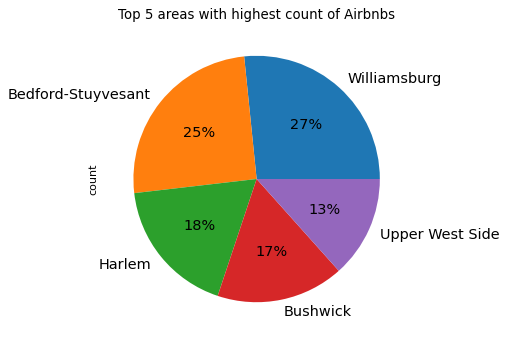

In [58]:
fig = plt.figure(figsize=(5,5), dpi=80)
data['area'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.title("Top 5 areas with highest count of Airbnbs")

# 3) Room Type

In [59]:
# we noted that the room_type is only of 3 particular types.
data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of each room type')

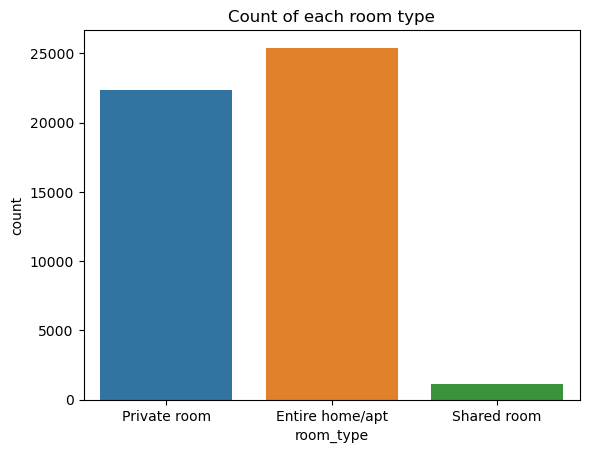

In [60]:
ax = sns.countplot(x="room_type", data=data)
plt.title("Count of each room type")

# 4) Price

In [61]:
data.price.value_counts().iloc[:10]

price
100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Airbnbs wrt Price')

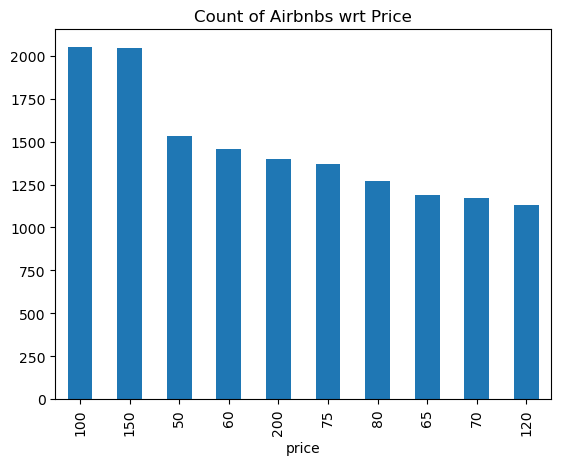

In [62]:
data.price.value_counts().iloc[:10].plot(kind = 'bar')
plt.title("Count of Airbnbs wrt Price")

Inference:
Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [63]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Inference:
The average/mean pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

# 5) Minimum Nights

In [64]:
data['minimum_nights'].value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: count, Length: 109, dtype: int64

In [65]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(data[data['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


<Axes: ylabel='minimum_nights'>

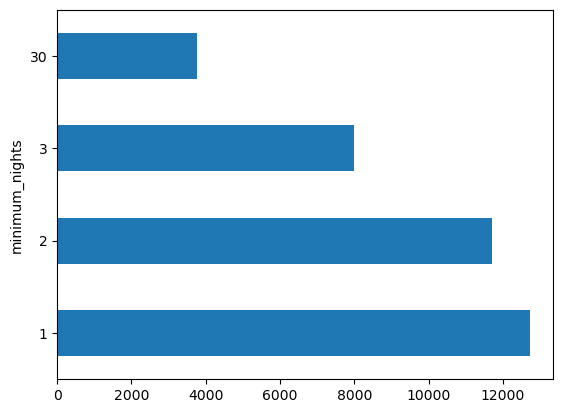

In [66]:
data['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

Inference:
We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

# 6) Availability

In [67]:
data['availability_365'].value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt

# 7) Location vs availability of room

Text(0.5, 1.0, 'Availability of room wrt Location')

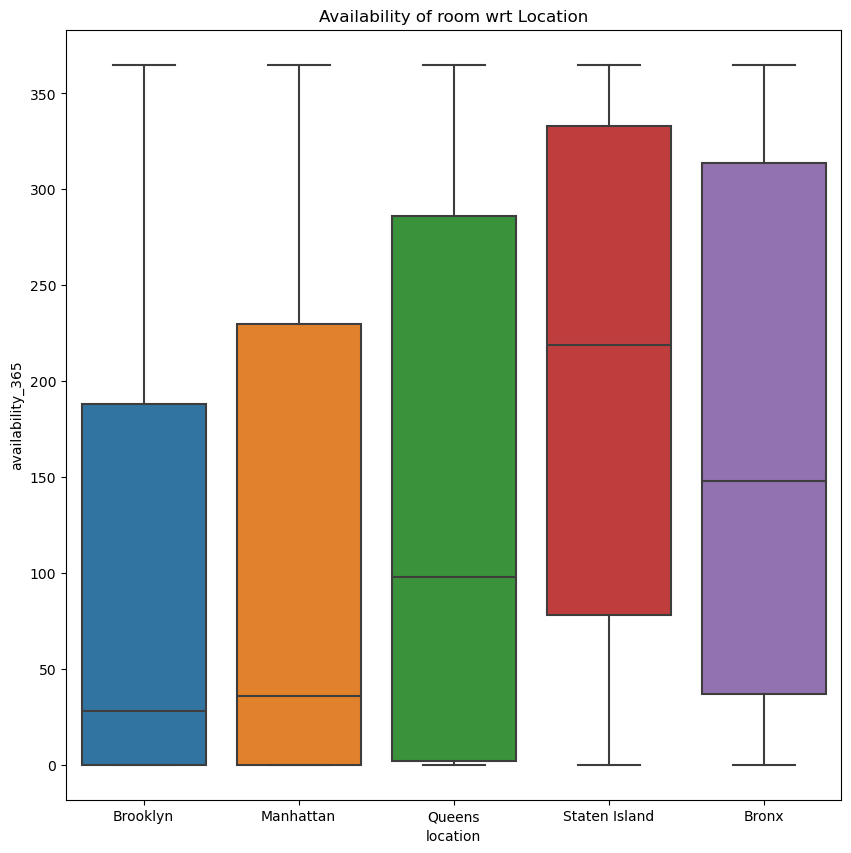

In [68]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='location',y='availability_365')
plt.title("Availability of room wrt Location")

# 8) Room type vs availability

Text(0.5, 1.0, 'Availability of room wrt Room type')

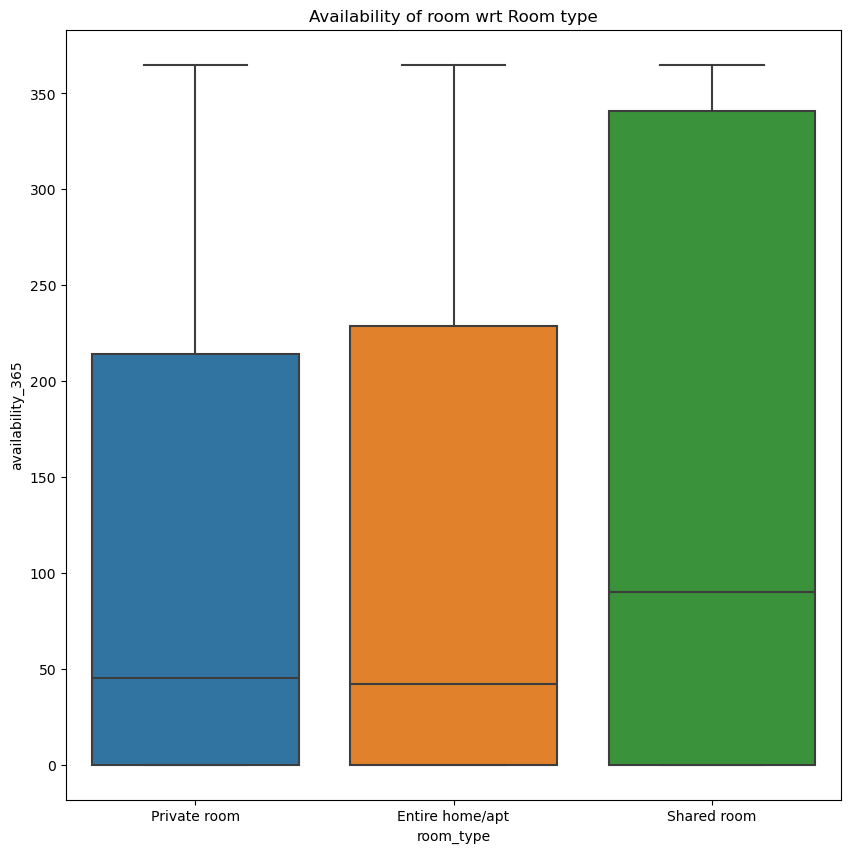

In [69]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='availability_365')
plt.title("Availability of room wrt Room type")

# 9) Map of New York with locations

In [70]:
fig = px.scatter(data, x='longitude', y='latitude',
                 color='location') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

# 10) Room Type vs Price vs Location

Text(0.5, 1.0, 'Room Type vs Price vs location')

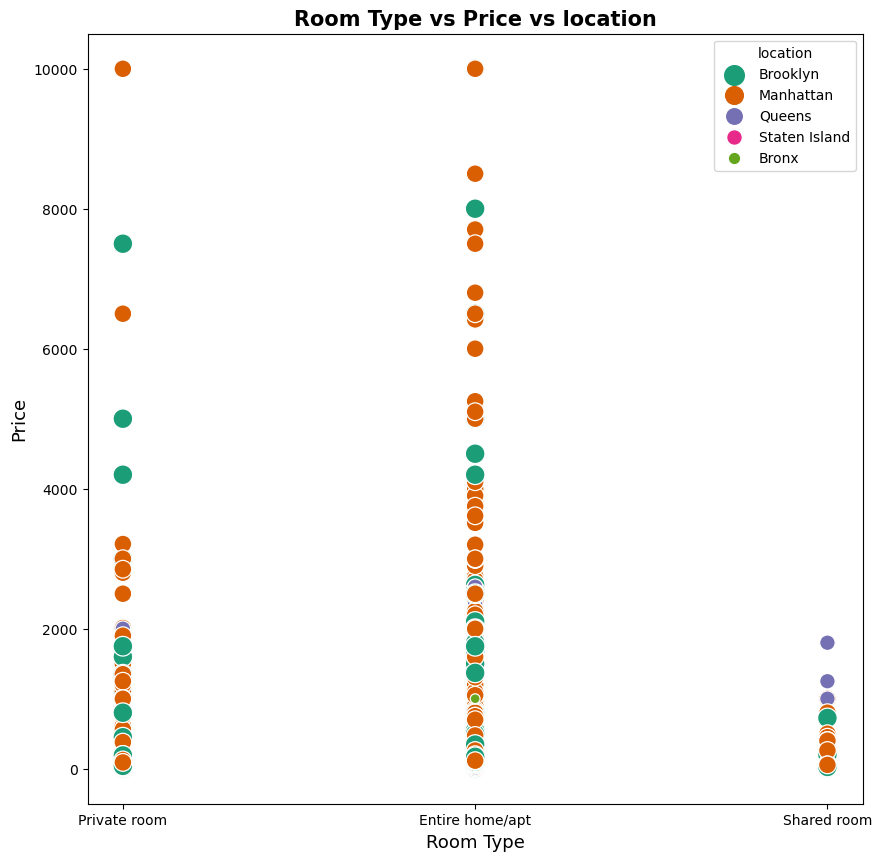

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="location", size="location",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs location",size=15, weight='bold')

#  Feature Engineering

In [72]:
feature_columns=['location','room_type','price','minimum_nights','calculated_host_listings_count','availability_365','area']

In [73]:
all_data=data[feature_columns]
all_data.head()

location        room_type  price  minimum_nights  \
0   Brooklyn     Private room    149               1   
1  Manhattan  Entire home/apt    225               1   
2  Manhattan     Private room    150               3   
3   Brooklyn  Entire home/apt     89               1   
4  Manhattan  Entire home/apt     80              10   

   calculated_host_listings_count  availability_365          area  
0                               6               365    Kensington  
1                               2               355       Midtown  
2                               1               365        Harlem  
3                               1               194  Clinton Hill  
4                               1                 0   East Harlem

# Encoding categorical variables

In [74]:
all_data['room_type']=all_data['room_type'].factorize()[0]
all_data['location']=all_data['location'].factorize()[0]
all_data['area']=all_data['area'].factorize()[0]
all_data

location  room_type  price  minimum_nights  \
0             0          0    149               1   
1             1          1    225               1   
2             1          0    150               3   
3             0          1     89               1   
4             1          1     80              10   
...         ...        ...    ...             ...   
48890         0          0     70               2   
48891         0          0     40               4   
48892         1          1    115              10   
48893         1          2     55               1   
48894         1          0     90               7   

       calculated_host_listings_count  availability_365  area  
0                                   6               365     0  
1                                   2               355     1  
2                                   1               365     2  
3                                   1               194     3  
4                                   1                 0     4  
...                               ...               ...   ...  
48890                               2                 9     6  
48891                               2                36    21  
48892                               1                27     2  
48893                               6                 2     7  
48894                               1                23     7  

[48895 rows x 7 columns]

In [75]:
joblib.dump(all_data['room_type'] , 'room_encoder.joblib')

['room_encoder.joblib']

In [76]:
joblib.dump(all_data['location'] , 'location_encoder.joblib')

['location_encoder.joblib']

In [77]:
joblib.dump(all_data['area'] , 'area_encoder.joblib')

['area_encoder.joblib']

# Train Test Split

In [78]:
y = all_data['price']
x= all_data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [79]:
x_train

location  room_type  minimum_nights  calculated_host_listings_count  \
41336         2          0               2                               1   
20017         1          0               1                               1   
9216          1          0               1                               2   
34229         0          1               3                               1   
30704         0          1               2                               1   
...         ...        ...             ...                             ...   
39712         0          1               5                               1   
48356         0          1               6                               1   
73            1          0               2                               2   
43798         0          0               4                               1   
12917         0          0               2                               1   

       availability_365  area  
41336               157    83  
20017                 0     1  
9216                  0    19  
34229                 0    32  
30704                64    22  
...                 ...   ...  
39712                23    75  
48356                18   111  
73                  336    30  
43798                17     6  
12917                 0     6  

[44005 rows x 6 columns]

# Modelling

# 1) Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.054
R-squared test score: 0.047


# 2) Ridge Regression

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.054
R-squared test score: 0.047


# 3) Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.047
R-squared score (test): 0.039


# 4) Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.358
R-squared score (test): 0.230


In [84]:
joblib.dump (DTree, 'decision_tree.joblib')

['decision_tree.joblib']

# 5) Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))

MemoryError: could not allocate 171966464 bytes